In [111]:
import pandas as pd

In [112]:
data = pd.read_csv('./data/vaccinationbycountry.csv')

In [113]:
# change date column to datetime type to get access to datetime functions
data['date'] = pd.to_datetime(data.date, dayfirst= True)
data['date'].head(5)

0   2021-01-10
1   2021-01-11
2   2021-01-12
3   2021-01-13
4   2021-01-14
Name: date, dtype: datetime64[ns]

In [114]:
# date range 20-01-2021 to 03-02-2021
startdate, enddate = [pd.to_datetime('20/01/2021'),pd.to_datetime('3/2/2021',dayfirst=True)]

# return dataframe in the range of start and end date
data = data.loc[(data['date']>=startdate)&(data['date']<=enddate)]

# assign the data frame to data
# data = data_in_range


In [115]:
UK = ["United Kingdom","UK", "United_Kindom", "England", "Scotland","Wales", "Northern Ireland"]
US = ["United States","United State","United_States", "US"]
countries = UK+US+["Norway","China","Australia"]

# filter data of required countries only
data = data.loc[data['country'].isin(countries)]

# filtered_data.info


In [150]:
# rename UK countries in country column to United Kingdom
uk_data = data.loc[data['country'].isin(UK)]
uk_data.loc[0:,'country'] = 'United Kingdom'
# uk_data.country.values


In [151]:
# rename UK countries in country column to United Kingdom
us_data = data.loc[data['country'].isin(US)]
us_data.loc[0:,'country'] = 'United States'
# us_data.country.values

array(['United States', 'United States', 'United States', 'United States',
       'United States', 'United States', 'United States', 'United States',
       'United States', 'United States', 'United States', 'United States',
       'United States', 'United States', 'United States'], dtype=object)

In [163]:
# get data for the remaining contries
norway_data = data.loc[data['country']=='Norway'] # Norway
china_data = data.loc[data['country']=='China'] # China
australia_data = data.loc[data['country']=='Australia'] # Australia
norway_data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
4125,Norway,NOR,2021-01-20,69118.0,67365.0,1753.0,10737.0,4528.0,1.27,1.24,0.03,835.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Norwegian Institute of Public Health,https://www.fhi.no/sv/vaksine/koronavaksinasjo...
4126,Norway,NOR,2021-01-21,77714.0,75793.0,1921.0,8596.0,4546.0,1.43,1.40,0.04,839.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Norwegian Institute of Public Health,https://www.fhi.no/sv/vaksine/koronavaksinasjo...
4127,Norway,NOR,2021-01-22,81034.0,79106.0,1928.0,3320.0,4382.0,1.49,1.46,0.04,808.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Norwegian Institute of Public Health,https://www.fhi.no/sv/vaksine/koronavaksinasjo...
4128,Norway,NOR,2021-01-23,81393.0,79465.0,1928.0,359.0,4326.0,1.50,1.47,0.04,798.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Norwegian Institute of Public Health,https://www.fhi.no/sv/vaksine/koronavaksinasjo...
4129,Norway,NOR,2021-01-24,81460.0,79532.0,1928.0,67.0,4286.0,1.50,1.47,0.04,791.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Norwegian Institute of Public Health,https://www.fhi.no/sv/vaksine/koronavaksinasjo...


In [167]:
# join the data frames
clean_df = pd.concat([australia_data,china_data,norway_data,uk_data,us_data], ignore_index=True)

In [190]:
# get total for each country
uk_total = clean_df.loc[clean_df['country']=='United Kingdom']['daily_vaccinations'].sum().asType('int')
us_total = clean_df.loc[clean_df['country']=='United States']['daily_vaccinations'].sum()
norway_total = clean_df.loc[clean_df['country']=='Norway']['daily_vaccinations'].sum()
china_total = clean_df.loc[clean_df['country']=='China']['daily_vaccinations'].sum()
australia_total = clean_df.loc[clean_df['country']=='Australia']['daily_vaccinations'].sum()

In [195]:
# create list of countries and total to create dataframe from
country_names = ['United Kingdom','United States','Norway','China','Australia']
vaccination_total = [uk_total,us_total,norway_total,china_total,australia_total]

In [217]:
# create new dataframe with only country and total
df = pd.DataFrame(data={'countries':country_names, 'total_vaccinated':vaccination_total})

In [236]:
# display newly created dataframe
df.total_vaccinated = df.total_vaccinated.astype(int)
df.sort_values('countries')


,countries,total_vaccinated
4,Australia,0
3,China,13650069
2,Norway,86206
0,United Kingdom,10983503
1,United States,17466671


(1.0, 20000000.0)

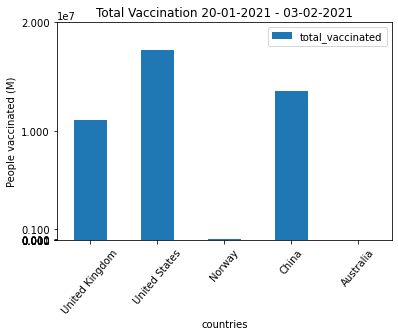

In [277]:
plt = df.plot(
    kind='bar',
    x='countries', y='total_vaccinated',
    rot=50,
    title="Total Vaccination 20-01-2021 - 03-02-2021",
    )
plt.set_ylabel("People vaccinated (M)")
plt.set_yticks([10,100,1000,10000,100000,1000000,10000000,20000000])
plt.set_ylim([1,20000000.0])
